# Exploring the Car Accidents in Monterrey, Mexico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import unicodedata
import numpy as np
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('DF_UNIFICADO.csv', index_col= None)
print('The dataset contians: ' + str(data.shape))
print('\nNull values in each variable: \n' + str(data.isnull().sum()))

The dataset contians: (99855, 52)

Null values in each variable: 
Unnamed: 0             0
Unnamed: 0.1           0
FOLIO_ID               0
LAT                    0
LONG                   0
CAUSA SINIESTRO        0
TIPO VEHICULO          0
COLOR                  0
NIVEL DAÑO VEHICULO    0
PUNTO DE IMPACTO       0
AÑO                    0
MES                    0
DÍA NUMERO             0
DIA                    0
ESTADO                 0
CIUDAD_APROXIMADA      0
MODEL_YEAR             0
complete_date          0
date_time              0
maxtempC               0
mintempC               0
totalSnow_cm           0
sunHour                0
uvIndex                0
uvIndex.1              0
moon_illumination      0
moonrise               0
moonset                0
sunrise                0
sunset                 0
DewPointC              0
FeelsLikeC             0
HeatIndexC             0
WindChillC             0
WindGustKmph           0
cloudcover             0
humidity               0
precipMM 

## Cleaning the Data

In [3]:
data.head(5)

Unnamed: 0  Unnamed: 0.1 FOLIO_ID        LAT        LONG  \
0           0             0   D00002  25.647351 -100.140132   
1           1             1   D00004  25.718027 -100.249990   
2           2             2   D00007  25.660916 -100.282504   
3           3             3   D00008  25.723590 -100.198780   
4           4             4   D00009  25.708889 -100.246876   

       CAUSA SINIESTRO TIPO VEHICULO     COLOR NIVEL DAÑO VEHICULO  \
0  COLISION Y/O VUELCO        Camión    blanco            Sin daño   
1  COLISION Y/O VUELCO          Auto     plata            Sin daño   
2  COLISION Y/O VUELCO          Auto     plata                Bajo   
3  COLISION Y/O VUELCO          Auto    blanco            Sin daño   
4  COLISION Y/O VUELCO          Auto  amarillo                Bajo   

      PUNTO DE IMPACTO  ...  windspeedKmph  holiday   gh4    gh5     gh6  \
0  Costado izq trasero  ...              8        0  9u8c  9u8cc  9u8cck   
1              Frontal  ...              3        0  9u8d  9u8dq  9u8dqc   
2              Frontal  ...              6        0  9u89  9u89y  9u89yp   
3              Frontal  ...             11        0  9u8d  9u8dr  9u8drf   
4              Frontal  ...              3        0  9u8d  9u8dq  9u8dqb   

       gh7       gh8     way_type has_crossing  night  
0  9u8cckb  9u8cckbn  residential            0      0  
1  9u8dqcb  9u8dqcb4      service            0      0  
2  9u89yp2  9u89yp2t      primary            1      0  
3  9u8drfv  9u8drfv6    secondary            0      0  
4  9u8dqb4  9u8dqb4m    secondary            0      1  

[5 rows x 52 columns]

In [4]:
data.drop (['Unnamed: 0', 'Unnamed: 0.1', 'FOLIO_ID','LAT', 'LONG'], axis = 1, inplace = True)

In [5]:
data.head(5)

CAUSA SINIESTRO TIPO VEHICULO     COLOR NIVEL DAÑO VEHICULO  \
0  COLISION Y/O VUELCO        Camión    blanco            Sin daño   
1  COLISION Y/O VUELCO          Auto     plata            Sin daño   
2  COLISION Y/O VUELCO          Auto     plata                Bajo   
3  COLISION Y/O VUELCO          Auto    blanco            Sin daño   
4  COLISION Y/O VUELCO          Auto  amarillo                Bajo   

      PUNTO DE IMPACTO   AÑO  MES  DÍA NUMERO  DIA      ESTADO  ...  \
0  Costado izq trasero  2018    1          25    4  NUEVO LEÓN  ...   
1              Frontal  2018    1          19    5  NUEVO LEÓN  ...   
2              Frontal  2018    1          22    1  NUEVO LEÓN  ...   
3              Frontal  2018    1          29    1  NUEVO LEÓN  ...   
4              Frontal  2018    2          26    1  NUEVO LEÓN  ...   

  windspeedKmph holiday   gh4    gh5     gh6      gh7       gh8     way_type  \
0             8       0  9u8c  9u8cc  9u8cck  9u8cckb  9u8cckbn  residential   
1             3       0  9u8d  9u8dq  9u8dqc  9u8dqcb  9u8dqcb4      service   
2             6       0  9u89  9u89y  9u89yp  9u89yp2  9u89yp2t      primary   
3            11       0  9u8d  9u8dr  9u8drf  9u8drfv  9u8drfv6    secondary   
4             3       0  9u8d  9u8dq  9u8dqb  9u8dqb4  9u8dqb4m    secondary   

   has_crossing  night  
0             0      0  
1             0      0  
2             1      0  
3             0      0  
4             0      1  

[5 rows x 47 columns]

In [6]:
# Renaming the variables
data.rename( columns = {'CAUSA SINIESTRO': 'ACCIDENT_CAUSE', 'TIPO VEHICULO': 'vehicle_type', 'NIVEL DAÑO VEHICULO': 'damage', 'COLOR':'color',
'PUNTO DE IMPACTO': 'impact', 'AÑO':'year','MES':'month','DÍA NUMERO':'day','ESTADO':'state','CIUDAD_APROXIMADA':'city', 'MODEL_YEAR':'model_year','DIA':'week_day_no'}, inplace =True)

In [7]:
data.head(5)

ACCIDENT_CAUSE vehicle_type     color    damage               impact  \
0  COLISION Y/O VUELCO       Camión    blanco  Sin daño  Costado izq trasero   
1  COLISION Y/O VUELCO         Auto     plata  Sin daño              Frontal   
2  COLISION Y/O VUELCO         Auto     plata      Bajo              Frontal   
3  COLISION Y/O VUELCO         Auto    blanco  Sin daño              Frontal   
4  COLISION Y/O VUELCO         Auto  amarillo      Bajo              Frontal   

   year  month  day  week_day_no       state  ... windspeedKmph holiday   gh4  \
0  2018      1   25            4  NUEVO LEÓN  ...             8       0  9u8c   
1  2018      1   19            5  NUEVO LEÓN  ...             3       0  9u8d   
2  2018      1   22            1  NUEVO LEÓN  ...             6       0  9u89   
3  2018      1   29            1  NUEVO LEÓN  ...            11       0  9u8d   
4  2018      2   26            1  NUEVO LEÓN  ...             3       0  9u8d   

     gh5     gh6      gh7       gh8     way_type  has_crossing  night  
0  9u8cc  9u8cck  9u8cckb  9u8cckbn  residential             0      0  
1  9u8dq  9u8dqc  9u8dqcb  9u8dqcb4      service             0      0  
2  9u89y  9u89yp  9u89yp2  9u89yp2t      primary             1      0  
3  9u8dr  9u8drf  9u8drfv  9u8drfv6    secondary             0      0  
4  9u8dq  9u8dqb  9u8dqb4  9u8dqb4m    secondary             0      1  

[5 rows x 47 columns]

In [8]:
data.ACCIDENT_CAUSE.value_counts()

COLISION Y/O VUELCO    99855
Name: ACCIDENT_CAUSE, dtype: int64

In [9]:
data.state.value_counts()


NUEVO LEÓN    99855
Name: state, dtype: int64

In [ ]:
data.drop(['ACCIDENT_CAUSE','state'],axis = 1, inplace = True)

In [11]:
data['vehicle_type'].value_counts()

Auto             75455
Camión           21860
Camión Ligero     2422
Motocicleta        118
Name: vehicle_type, dtype: int64

In [12]:
data['vehicle_type'] = data['vehicle_type'].map({'Auto':'car','Camión':'truck','Camión Ligero':'light truck','Motocicleta':'motorcycle'})

In [13]:
data.color.value_counts()

blanco      36319
plata       25526
rojo        12785
negro        7024
azul         6922
cafe         4590
verde        2830
amarillo     1911
dorado        882
naranja       579
morado        487
Name: color, dtype: int64

In [14]:
data['color'] = data['color'].map({'blanco': 'white','plata':'silver',
'rojo':'red','negro':'black','azul':'blue','cafe':'brown','verde':'green','amarillo':'yellow','dorado':'gold','naranja':'orange','morado':'purple'})

In [15]:
data.color.value_counts()

white     36319
silver    25526
red       12785
black      7024
blue       6922
brown      4590
green      2830
yellow     1911
gold        882
orange      579
purple      487
Name: color, dtype: int64

In [16]:
data.damage.value_counts()

Bajo        57856
Sin daño    40576
Medio        1182
Alto          241
Name: damage, dtype: int64

In [17]:
data['damage'] = data['damage'].map({'Bajo':'Low','Sin daño':'None','Medio':'Med','Alto':'High'})

In [18]:
data.impact.value_counts()

Frontal                  31387
Trasero                  22919
Cofre                    13177
Costado der delantero     7611
Costado izq delantero     6261
Costado der trasero       5255
Costado izq trasero       5003
Costado der central       3572
Costado izq central       3254
Parte baja                 793
Toldo                      562
Tapa cajuela                61
Name: impact, dtype: int64

In [19]:
data['impact'] = data['impact'].map({'Frontal':'front','Trasero':'back','Cofre':'hood', 'Costado der delantero':'front','Costado izq delantero':'front','Costado der trasero' : 'back','Costado izq trasero':'back','Costado der central':'center','Costado izq central':'center','Parte baja':'bottom','Toldo': 'roof','Tapa cajuela':'trunk lid'})

In [20]:
data['week_day_no'].value_counts()

5    16703
2    16320
3    15993
4    15569
1    15013
6    13355
7     6902
Name: week_day_no, dtype: int64

In [21]:
data['week_day_no']= data['week_day_no'].map({1:'Mo',2:'Tu',3:'We',4:'Th',5:'Fr',6:'Sa',7:'Su'})

In [22]:
data.city.value_counts()

MONTERREY                   42099
SAN NICOLAS DE LOS GARZA    11795
GUADALUPE                   11565
GARZA GARCIA                 8542
APODACA                      8370
                            ...  
ZONA LOMA LARGA PONIENTE        1
TAD PEMEX REFINACIÓN            1
RANCHO CARVAJAL                 1
MIRADOR RESIDENCIAL             1
SANTA LUCÍA                     1
Name: city, Length: 66, dtype: int64

In [23]:
#function to remove the accents
def remove_accents(text):
    new = unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8','ignore')
    return new
def lower_case(text):
    return text.lower()

In [24]:
data['city'] = data['city'].apply(remove_accents)

In [25]:
data.city.value_counts()

MONTERREY                   42099
SAN NICOLAS DE LOS GARZA    11795
GUADALUPE                   11565
GARZA GARCIA                 8542
APODACA                      8370
                            ...  
ANAHUAC                         1
LOS TRES NOGALES                1
ZONA LOMA LARGA PONIENTE        1
FRACCIONAMIENTO EL JARAL        1
VALLE SUR                       1
Name: city, Length: 66, dtype: int64

In [26]:
data.model_year.value_counts()


2010-2015    35004
2005-2010    25521
2015-2020    17150
2000-2005    13154
older         9026
Name: model_year, dtype: int64

In [27]:
data.head(5)

vehicle_type   color damage impact  year  month  day week_day_no  \
0        truck   white   None   back  2018      1   25          Th   
1          car  silver   None  front  2018      1   19          Fr   
2          car  silver    Low  front  2018      1   22          Mo   
3          car   white   None  front  2018      1   29          Mo   
4          car  yellow    Low  front  2018      2   26          Mo   

                       city model_year  ... windspeedKmph holiday   gh4  \
0                    JUAREZ  2005-2010  ...             8       0  9u8c   
1  SAN NICOLAS DE LOS GARZA  2015-2020  ...             3       0  9u8d   
2                 MONTERREY  2005-2010  ...             6       0  9u89   
3                 GUADALUPE  2000-2005  ...            11       0  9u8d   
4  SAN NICOLAS DE LOS GARZA  2010-2015  ...             3       0  9u8d   

     gh5     gh6      gh7       gh8     way_type  has_crossing night  
0  9u8cc  9u8cck  9u8cckb  9u8cckbn  residential             0     0  
1  9u8dq  9u8dqc  9u8dqcb  9u8dqcb4      service             0     0  
2  9u89y  9u89yp  9u89yp2  9u89yp2t      primary             1     0  
3  9u8dr  9u8drf  9u8drfv  9u8drfv6    secondary             0     0  
4  9u8dq  9u8dqb  9u8dqb4  9u8dqb4m    secondary             0     1  

[5 rows x 45 columns]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99855 entries, 0 to 99854
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_type       99855 non-null  object 
 1   color              99855 non-null  object 
 2   damage             99855 non-null  object 
 3   impact             99855 non-null  object 
 4   year               99855 non-null  int64  
 5   month              99855 non-null  int64  
 6   day                99855 non-null  int64  
 7   week_day_no        99855 non-null  object 
 8   city               99855 non-null  object 
 9   model_year         99855 non-null  object 
 10  complete_date      99855 non-null  object 
 11  date_time          99855 non-null  object 
 12  maxtempC           99855 non-null  int64  
 13  mintempC           99855 non-null  int64  
 14  totalSnow_cm       99855 non-null  float64
 15  sunHour            99855 non-null  float64
 16  uvIndex            998

In [29]:
data.holiday = data.holiday.map({1:'Yes',0:'No'})
data.holiday

0        No
1        No
2        No
3        No
4        No
         ..
99850    No
99851    No
99852    No
99853    No
99854    No
Name: holiday, Length: 99855, dtype: object

## Exploring the Data

In [30]:
numeric_variables = data.select_dtypes(include = 'int')

In [31]:
numeric_variables

year  month  day  maxtempC  mintempC  uvIndex  uvIndex.1  \
0      2018      1   25        12         6        3          2   
1      2018      1   19        17         2        3          3   
2      2018      1   22        17        10        4          5   
3      2018      1   29        15        10        3          4   
4      2018      2   26        19        14        5          1   
...     ...    ...  ...       ...       ...      ...        ...   
99850  2016     12   20        15         3        3          4   
99851  2016      1   18        16         4        3          5   
99852  2016     12   29        21        11        5          1   
99853  2016      1   30        25         9        4          7   
99854  2016     12   24        21        14        5          1   

       moon_illumination  DewPointC  FeelsLikeC  ...  WindGustKmph  \
0                     57          2           7  ...            10   
1                     13          2           9  ...             3   
2                     35         -3          18  ...             7   
3                     86          1          13  ...            16   
4                     77         14          16  ...             5   
...                  ...        ...         ...  ...           ...   
99850                 53         -2          15  ...             9   
99851                 59         -1          17  ...            15   
99852                  0          7          11  ...            16   
99853                 54         -7          25  ...             2   
99854                 24         14          18  ...            10   

       cloudcover  humidity  pressure  tempC  visibility  winddirDegree  \
0              27        64      1027      8           9            112   
1               5        61      1024      7          10            295   
2               4        24      1019     17          10             28   
3               5        41      1028     14          10             84   
4               9        84      1017     15          10             76   
...           ...       ...       ...    ...         ...            ...   
99850           3        33      1026     13          10             95   
99851           0        29      1022     16          10             91   
99852          90        68      1028     12           8            251   
99853           8        11      1011     25          10            131   
99854           4        81      1013     16          10            137   

       windspeedKmph  has_crossing  night  
0                  8             0      0  
1                  3             0      0  
2                  6             1      0  
3                 11             0      0  
4                  3             0      1  
...              ...           ...    ...  
99850              7             0      0  
99851             13             0      0  
99852             13             0      1  
99853              2             0      0  
99854              6             0      1  

[99855 rows x 22 columns]

In [32]:
corr = numeric_variables.corr()
corr

year     month       day  maxtempC  mintempC   uvIndex  \
year               1.000000 -0.253172  0.004926 -0.035956 -0.051913 -0.030543   
month             -0.253172  1.000000 -0.028381  0.073437  0.239710  0.134162   
day                0.004926 -0.028381  1.000000  0.047834  0.056904  0.016301   
maxtempC          -0.035956  0.073437  0.047834  1.000000  0.833501  0.913404   
mintempC          -0.051913  0.239710  0.056904  0.833501  1.000000  0.815730   
uvIndex           -0.030543  0.134162  0.016301  0.913404  0.815730  1.000000   
uvIndex.1         -0.009764  0.021162  0.015535  0.328029  0.262501  0.308180   
moon_illumination  0.002648  0.018296 -0.033030  0.000862  0.046476 -0.017947   
DewPointC          0.009575  0.391146 -0.005539  0.489331  0.736549  0.496839   
FeelsLikeC        -0.035143  0.123749  0.042606  0.883295  0.806615  0.823044   
HeatIndexC        -0.034051  0.132251  0.040234  0.882157  0.810846  0.824143   
WindChillC        -0.035584  0.100938  0.045627  0.882518  0.777535  0.818706   
WindGustKmph       0.033338 -0.053213  0.024191  0.207168  0.243907  0.226969   
cloudcover        -0.070512  0.105658  0.017084 -0.284420  0.045012 -0.245076   
humidity           0.033007  0.304908 -0.028816 -0.252714  0.094245 -0.201474   
pressure          -0.017301  0.047072 -0.089040 -0.752341 -0.623036 -0.671946   
tempC             -0.032979  0.104702  0.043557  0.862132  0.794075  0.808073   
visibility        -0.015065 -0.077456 -0.014311  0.067930 -0.122159  0.081934   
winddirDegree     -0.050434 -0.139951  0.060978  0.018924 -0.092756 -0.020932   
windspeedKmph      0.026614 -0.070027  0.009334  0.195262  0.235701  0.221021   
has_crossing      -0.008555 -0.004354 -0.001234 -0.004912 -0.009020 -0.007735   
night              0.002218  0.037244 -0.003566 -0.103916 -0.101295 -0.098175   

                   uvIndex.1  moon_illumination  DewPointC  FeelsLikeC  ...  \
year               -0.009764           0.002648   0.009575   -0.035143  ...   
month               0.021162           0.018296   0.391146    0.123749  ...   
day                 0.015535          -0.033030  -0.005539    0.042606  ...   
maxtempC            0.328029           0.000862   0.489331    0.883295  ...   
mintempC            0.262501           0.046476   0.736549    0.806615  ...   
uvIndex             0.308180          -0.017947   0.496839    0.823044  ...   
uvIndex.1           1.000000          -0.006463   0.076959    0.499414  ...   
moon_illumination  -0.006463           1.000000   0.112936    0.019358  ...   
DewPointC           0.076959           0.112936   1.000000    0.506073  ...   
FeelsLikeC          0.499414           0.019358   0.506073    1.000000  ...   
HeatIndexC          0.499455           0.022365   0.517824    0.994629  ...   
WindChillC          0.520671           0.008690   0.440434    0.990910  ...   
WindGustKmph       -0.068165           0.000306   0.026019    0.233541  ...   
cloudcover         -0.232362           0.051003   0.185982   -0.266693  ...   
humidity           -0.368780           0.096862   0.601145   -0.348478  ...   
pressure           -0.225879           0.047674  -0.304558   -0.722663  ...   
tempC               0.504746           0.006591   0.447735    0.979562  ...   
visibility          0.088940          -0.039853  -0.201589    0.030355  ...   
winddirDegree       0.028433          -0.090411  -0.281450   -0.093850  ...   
windspeedKmph       0.083194          -0.005914   0.002063    0.279832  ...   
has_crossing        0.005998          -0.007762  -0.011656    0.001686  ...   
night              -0.651160           0.007788  -0.005704   -0.324189  ...   

                   WindGustKmph  cloudcover  humidity  pressure     tempC  \
year                   0.033338   -0.070512  0.033007 -0.017301 -0.032979   
month                 -0.053213    0.105658  0.304908  0.047072  0.104702   
day                    0.024191    0.017084 -0.028816 -0.089040  0.043557   
maxtempC               0.207168  

In [33]:
corr = numeric_variables.corr()

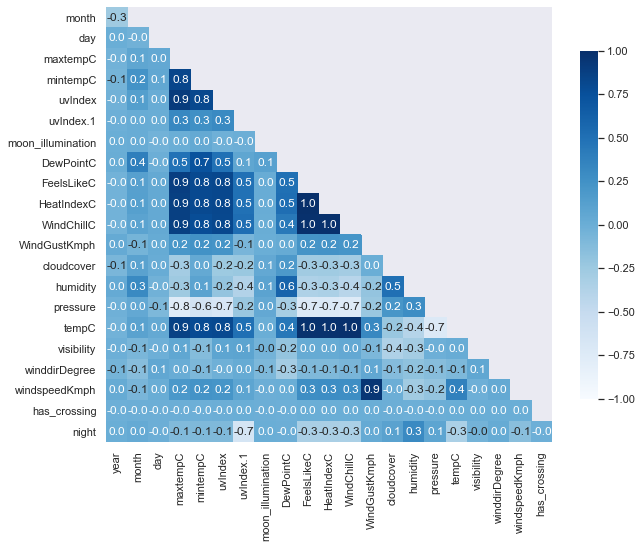

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()


# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [35]:
#numeric features described
data.describe()

year         month           day      maxtempC      mintempC  \
count  99855.000000  99855.000000  99855.000000  99855.000000  99855.000000   
mean    2016.702579      5.967673     15.649332     25.519623     14.785459   
std        0.734661      3.431920      8.760555      5.745801      4.891137   
min     2016.000000      1.000000      1.000000      2.000000     -3.000000   
25%     2016.000000      3.000000      8.000000     22.000000     12.000000   
50%     2017.000000      6.000000     16.000000     27.000000     16.000000   
75%     2017.000000      9.000000     23.000000     30.000000     19.000000   
max     2018.000000     12.000000     31.000000     37.000000     26.000000   

       totalSnow_cm       sunHour       uvIndex     uvIndex.1  \
count  99855.000000  99855.000000  99855.000000  99855.000000   
mean       0.007356     10.883007      5.246748      4.424385   
std        0.218536      1.237209      1.169269      2.394632   
min        0.000000      5.200000      1.000000      1.000000   
25%        0.000000     10.500000      5.000000      1.000000   
50%        0.000000     11.600000      5.000000      5.000000   
75%        0.000000     11.600000      6.000000      6.000000   
max        6.500000     11.600000      7.000000      9.000000   

       moon_illumination  ...    cloudcover      humidity      precipMM  \
count       99855.000000  ...  99855.000000  99855.000000  99855.000000   
mean           45.608012  ...     19.657153     52.264193      0.101254   
std            31.216102  ...     24.399714     19.841223      0.339765   
min             0.000000  ...      0.000000      5.000000      0.000000   
25%            18.000000  ...      3.000000     38.000000      0.000000   
50%            45.000000  ...      9.000000     52.000000      0.000000   
75%            72.000000  ...     27.000000     68.000000      0.000000   
max           100.000000  ...    100.000000     97.000000     10.600000   

           pressure         tempC    visibility  winddirDegree  windspeedKmph  \
count  99855.000000  99855.000000  99855.000000   99855.000000   99855.000000   
mean    1014.982885     21.634851      9.685834     125.927615      10.258565   
std        5.386303      6.333439      0.904294      74.270143       5.029814   
min      999.000000     -3.000000      0.000000       0.000000       0.000000   
25%     1011.000000     18.000000     10.000000      89.000000       7.000000   
50%     1014.000000     22.000000     10.000000     110.000000      10.000000   
75%     1018.000000     26.000000     10.000000     129.000000      13.000000   
max     1038.000000     37.000000     10.000000     360.000000      46.000000   

       has_crossing         night  
count  99855.000000  99855.000000  
mean       0.077843      0.201632  
std        0.267926      0.401221  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 25 columns]

In [36]:
counts = data.vehicle_type.value_counts()
percentage = data.vehicle_type.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percentage})
print(light_conditions)

             counts Percent
car           75455   75.6%
truck         21860   21.9%
light truck    2422    2.4%
motorcycle      118    0.1%


In [37]:
pd.crosstab(index=data['vehicle_type'], columns=data['color'])

color         black  blue  brown  gold  green  orange  purple    red  silver  \
vehicle_type                                                                   
car            6321  5491   4146   814   1932     203     270  10216   23812   
light truck      83    99     60     4     50      15      26    249     323   
motorcycle       23     2      1     2      1       0       1     32       6   
truck           597  1330    383    62    847     361     190   2288    1385   

color         white  yellow  
vehicle_type                 
car           21558     692  
light truck    1460      53  
motorcycle       45       5  
truck         13256    1161

In [38]:
from dataprep.eda import plot

In [39]:
#plot(data)

In [40]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Profiling
from pandas_profiling import ProfileReport

In [41]:
# Profiling Report
#profile = ProfileReport(data , title = ' Car Collisions Report', explorative = True , html={'style':{'full_width':True}})
#profile.to_file('profiling_cars.html')

In [42]:
def desc_table(df, features):
    from pandas.plotting import table #vizualization
    #Statistics Table
    if len(features) == 2: 
        color_type_class = pd.crosstab(index=df[features[0]], 
                                columns=[df[features[1]]],
                                margins=True)
    elif len(features) == 3:
        color_type_class = pd.crosstab(index=df[features[0]], 
                            columns=[df[features[1]], df[features[2]]],
                            margins=True)
    color_type_class = color_type_class.round(2)
    #subplot without frame
    plot = plt.subplot(111, frame_on=False)
    #remove axis
    plot.xaxis.set_visible(False) 
    plot.yaxis.set_visible(False) 
    table = table(plot, color_type_class,rowLabels = ['']*color_type_class.shape[0], loc  = 'center' , colWidths=[0.3 for x in color_type_class.columns])
    table.auto_set_font_size(False)
    table.set_fontsize(14) 
    table.scale(2, 2)
    return color_type_class, table

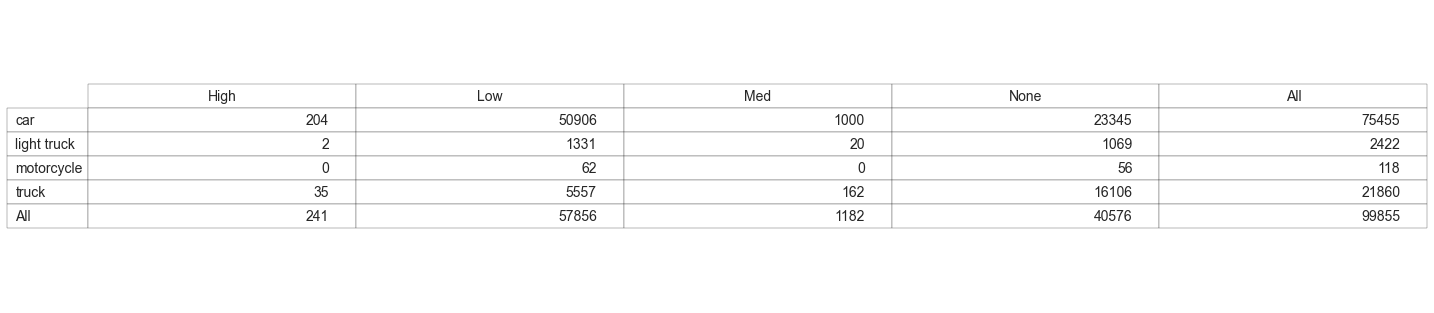

In [43]:
vehicle_type_damage = desc_table(data,['vehicle_type','damage'])

In [44]:
vehicle_type_damage[0]

damage        High    Low   Med   None    All
vehicle_type                                 
car            204  50906  1000  23345  75455
light truck      2   1331    20   1069   2422
motorcycle       0     62     0     56    118
truck           35   5557   162  16106  21860
All            241  57856  1182  40576  99855

In [45]:
freq_rel = vehicle_type_damage[0]/vehicle_type_damage[0].loc["All"]    # Divide by column totals

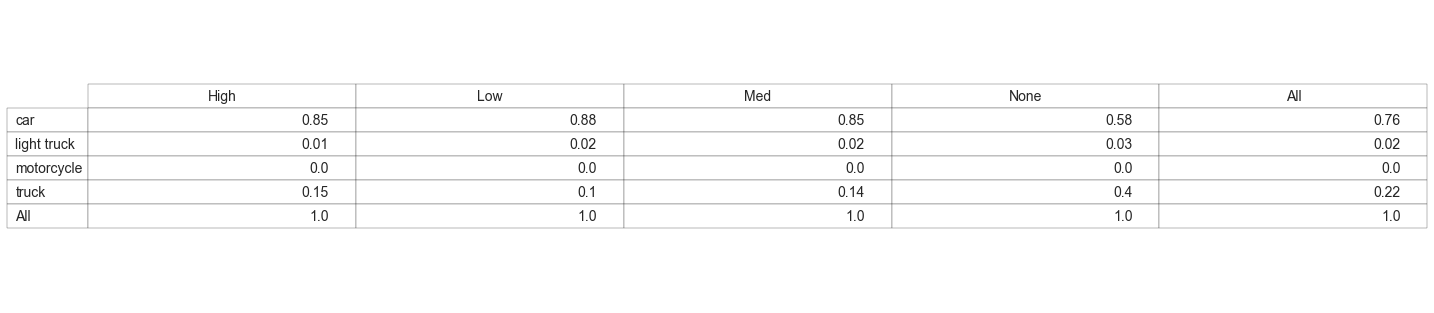

In [46]:
from pandas.plotting import table #vizualization
plot = plt.subplot(111, frame_on=False)
freq_rel= freq_rel.round(2)
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
table = table(plot, freq_rel, rowLabels = ['']*freq_rel.shape[0], loc  = 'center' , colWidths=[0.3 for x in freq_rel.columns])
table.auto_set_font_size(False)
table.set_fontsize(14) 
table.scale(2, 2)

(damage      High    Low   Med   None    All
 model_year                                 
 2000-2005     15   7161   103   5875  13154
 2005-2010     47  14567   266  10641  25521
 2010-2015    108  21276   442  13178  35004
 2015-2020     67  11709   338   5036  17150
 older          4   3143    33   5846   9026
 All          241  57856  1182  40576  99855,
 <matplotlib.table.Table at 0x7fc23401a310>)

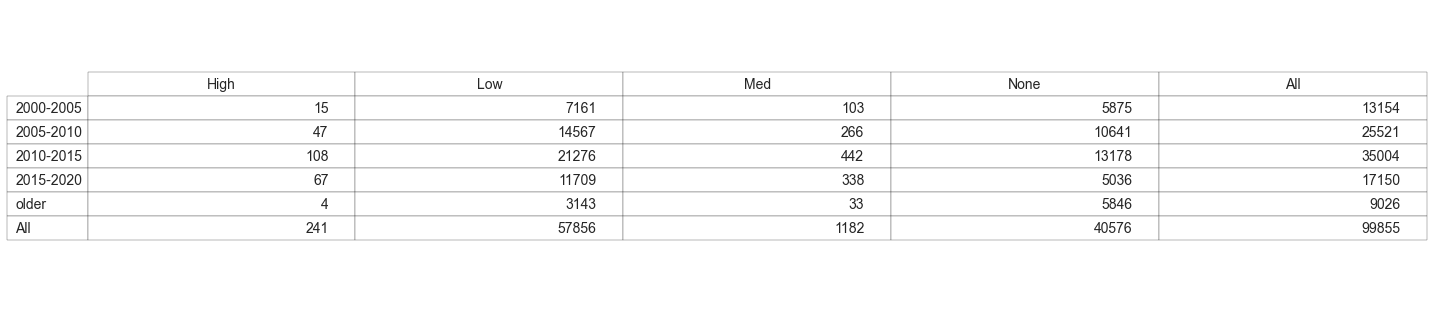

In [47]:
desc_table(data,['model_year','damage'])

(impact   back  bottom  center  front   hood  roof  trunk lid    All
 damage                                                             
 High       34       5      19    108     71     4          0    241
 Low     18591     440    3968  28361   6316   159         21  57856
 Med       184      23     127    540    298     7          3   1182
 None    14368     325    2712  16250   6492   392         37  40576
 All     33177     793    6826  45259  13177   562         61  99855,
 <matplotlib.table.Table at 0x7fc23eccb950>)

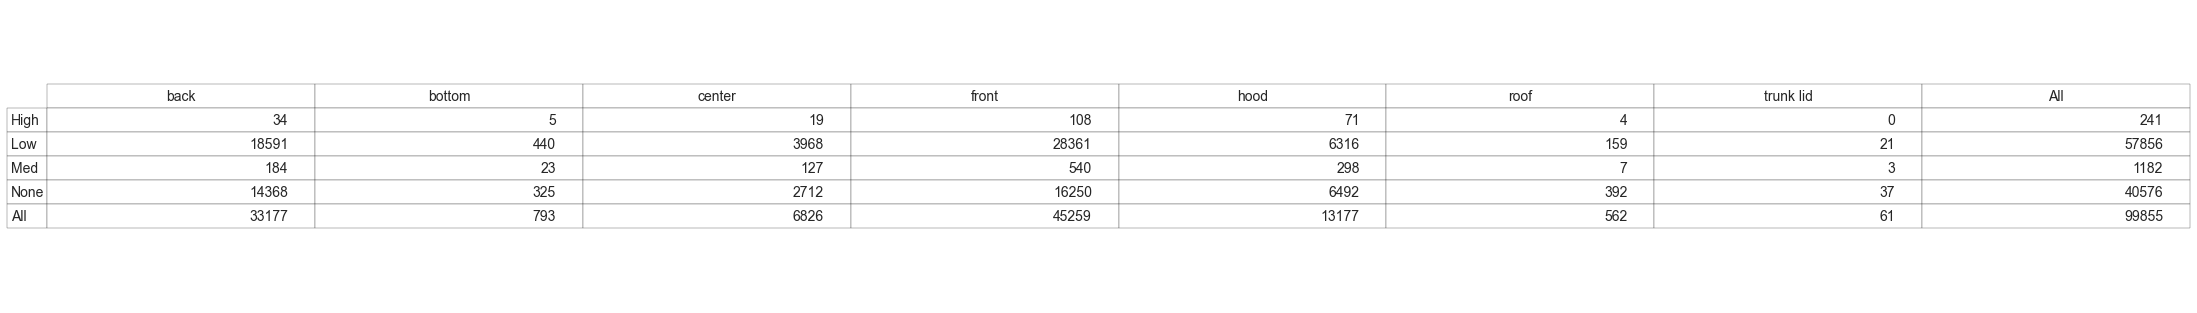

In [48]:
desc_table(data,['damage','impact'])

In [49]:
data.holiday.value_counts()

No     98421
Yes     1434
Name: holiday, dtype: int64

In [50]:
color_type_class = pd.crosstab(index=data['damage'], 
                        columns='holiday',
                        margins=True)
color_type_class

col_0   holiday    All
damage                
High        241    241
Low       57856  57856
Med        1182   1182
None      40576  40576
All       99855  99855

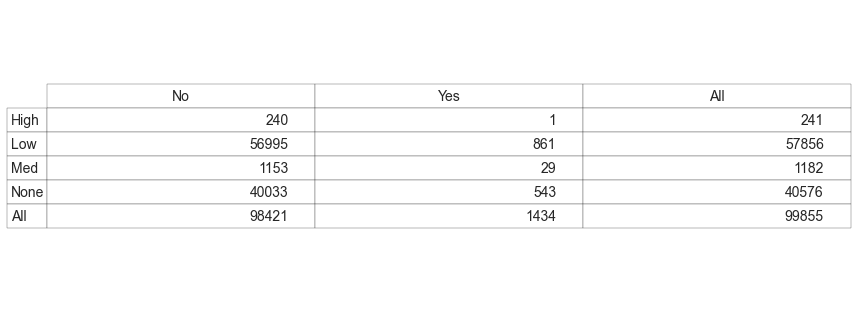

In [51]:
holiday = desc_table(data,['damage','holiday'])

In [52]:
freq_rel = holiday[0]/holiday[0].loc["All"]  
freq_rel

holiday        No       Yes       All
damage                               
High     0.002439  0.000697  0.002413
Low      0.579094  0.600418  0.579400
Med      0.011715  0.020223  0.011837
None     0.406753  0.378661  0.406349
All      1.000000  1.000000  1.000000

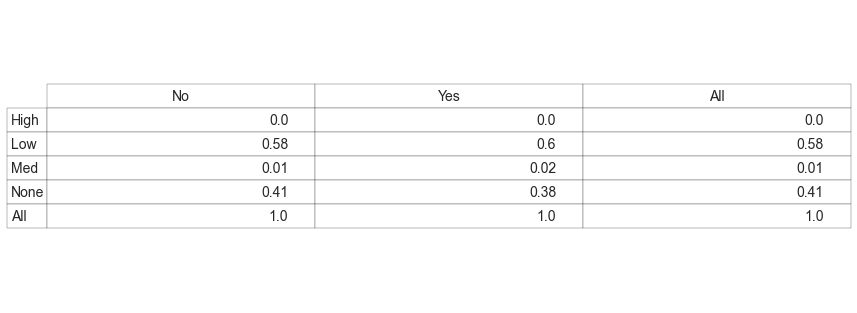

In [53]:
from pandas.plotting import table #vizualization
plot = plt.subplot(111, frame_on=False)
freq_rel= freq_rel.round(2)
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
table = table(plot, freq_rel, rowLabels = ['']*freq_rel.shape[0], loc  = 'center' , colWidths=[0.3 for x in freq_rel.columns])
table.auto_set_font_size(False)
table.set_fontsize(14) 
table.scale(2, 2)

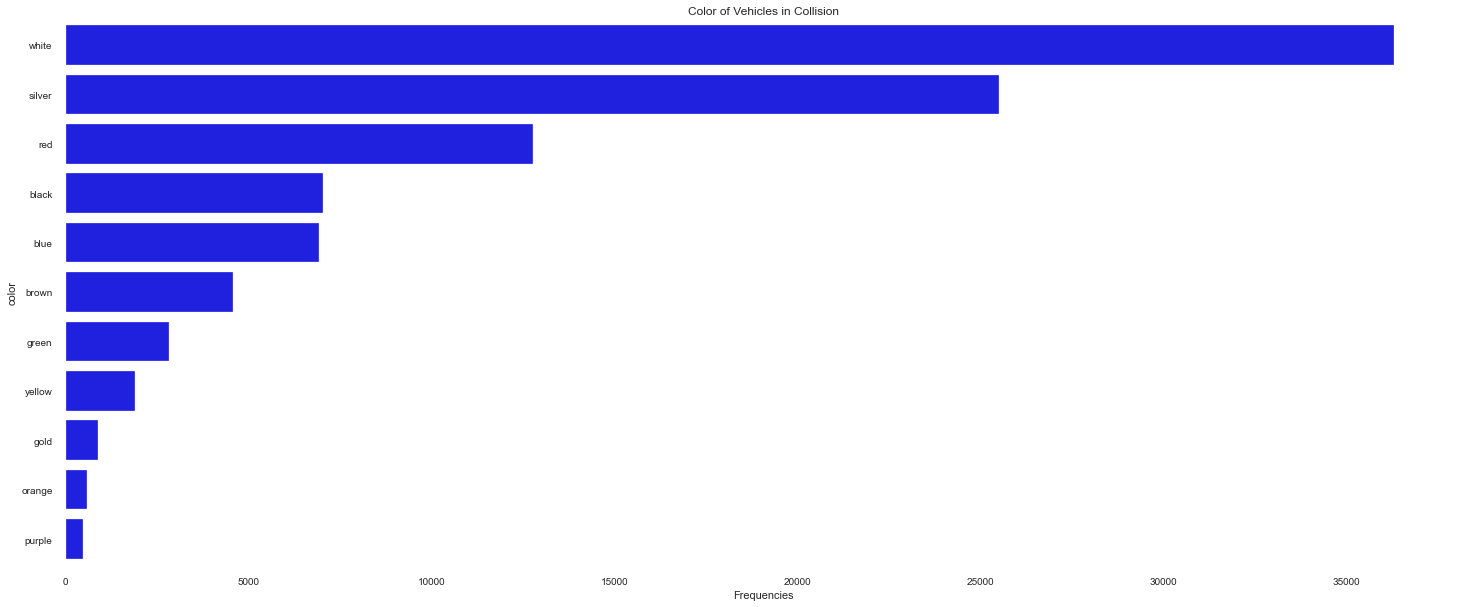

In [54]:
plt.subplots(figsize=(25,10))
sns.countplot(y = data['color'],order = data['color'].value_counts().index ,color = 'blue')
plt.title('Color of Vehicles in Collision')
plt.xlabel('Frequencies')
plt.show()

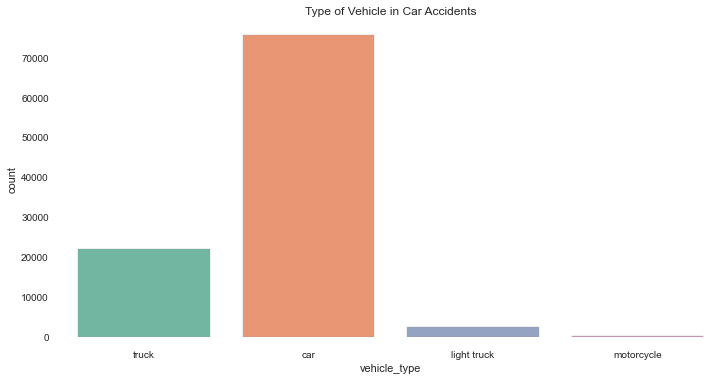

In [55]:
sns.factorplot(
            data=data,
            x='vehicle_type',
            kind = 'count',
            margin_titles  = True,
            ci = None, aspect = 2,
            palette='Set2',
            edgecolor=".6"
            )
plt.title('Type of Vehicle in Car Accidents')
plt.show() 

In [67]:
top_10_cities = data.city.value_counts()[:10].index.tolist()

In [68]:
data_top10 = data[data['city'].isin(top_10_cities)]

Text(0.5, 0.98, 'Collisions by City')

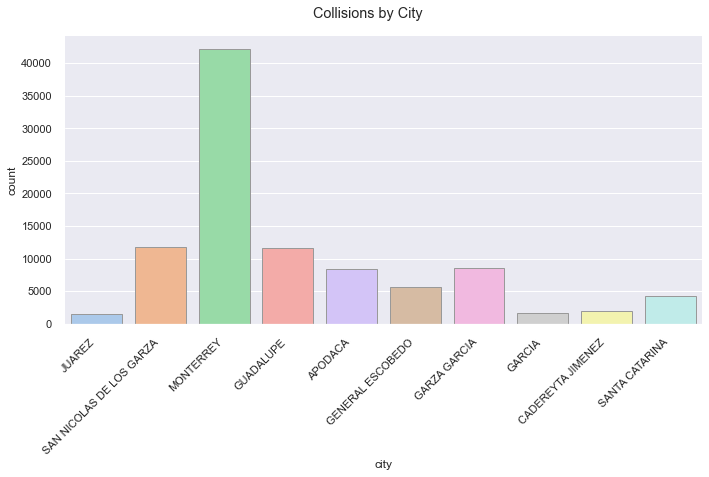

In [58]:
sns.set(rc={'figure.figsize':(20,11)})
chart = sns.factorplot(
            data=data_top10,
            x='city',
            kind = 'count',
            margin_titles  = True,
            ci = None, aspect = 2,
            palette='pastel',
            edgecolor=".6"
            )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('city')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by City')

Text(0.5, 0.98, 'Collisions by Point of Impact in day and night')

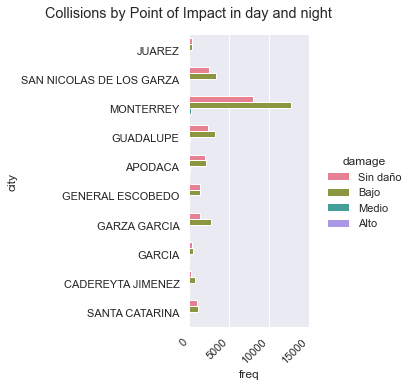

In [90]:
    chart = sns.factorplot(
    data=data_top10,
    y='city',
    kind = 'count',
    hue = 'damage',
    margin_titles  = True,
    ci = None, aspect = 1,
    palette="husl"
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('freq')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by Point of Impact in day and night')

In [68]:
# Number of accident per day of the week
accidents_day = data.groupby(data['week_day_no']).count()

In [70]:
accidents_day.index

Index(['Fr', 'Mo', 'Sa', 'Su', 'Th', 'Tu', 'We'], dtype='object', name='week_day_no')

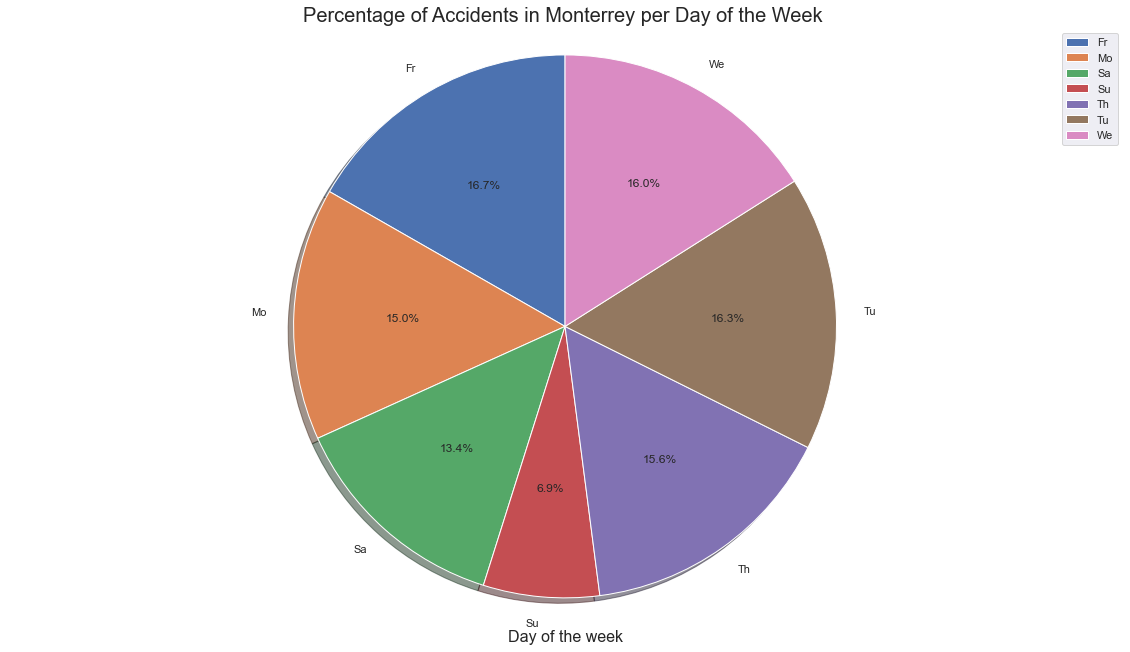

In [83]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(accidents_day.vehicle_type, labels = [x for x in accidents_day.index] ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# title and x,y labels
plt.title('Percentage of Accidents in Monterrey per Day of the Week ', fontsize=20)
plt.legend(labels=[x for x in accidents_day.index] )
plt.xlabel('Day of the week',fontsize=16)
plt.show()

In [78]:
# day or night
night_day = data.groupby(data['night']).count()

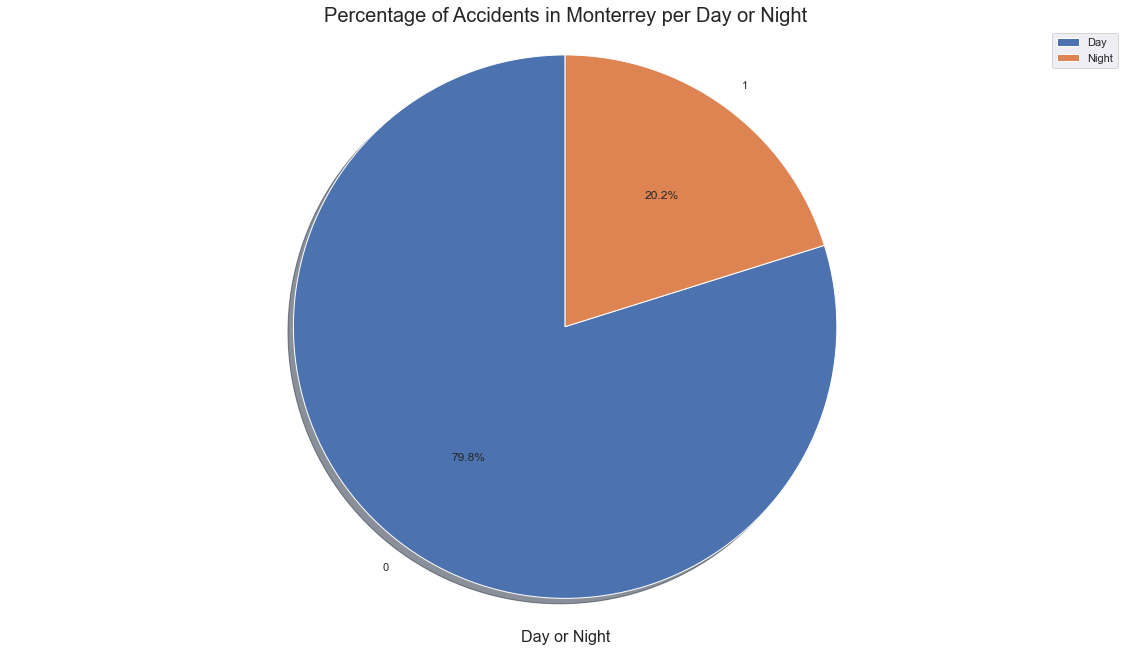

In [85]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(night_day.vehicle_type, labels = [x for x in night_day.index] ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# title and x,y labels
plt.title('Percentage of Accidents in Monterrey per Day or Night', fontsize=20)
plt.legend(labels=['Day','Night'])
plt.xlabel('Day or Night',fontsize=16)
plt.show()

In [102]:
data.damage.value_counts()

Low     57856
None    40576
Med      1182
High      241
Name: damage, dtype: int64

In [110]:
damage_low = data[data['damage']!='Low'].groupby(data['week_day_no']).sum()
damage_med = data[data['damage']!='Med'].groupby(data['week_day_no']).sum()
damage_high = data[data['damage']!='High'].groupby(data['week_day_no']).sum()
damage_total = data.groupby(data['week_day_no']).sum()

In [113]:
damage_high =damage_high/damage_total
damage_med =damage_med/damage_total
damage_low =damage_low/damage_total

In [119]:
damage_low

year     month       day  maxtempC  mintempC  totalSnow_cm  \
week_day_no                                                                   
Fr           0.423640  0.425906  0.425854  0.424596  0.425712      0.442478   
Mo           0.427835  0.423283  0.430272  0.427937  0.428615           NaN   
Sa           0.411086  0.408564  0.413080  0.412988  0.413278           NaN   
Su           0.372218  0.369597  0.373338  0.375018  0.374690           NaN   
Th           0.425016  0.424490  0.427103  0.425565  0.425559           NaN   
Tu           0.426046  0.428377  0.426200  0.425814  0.426917           NaN   
We           0.429629  0.433917  0.429095  0.430977  0.432359           NaN   

              sunHour   uvIndex  uvIndex.1  moon_illumination  ...  \
week_day_no                                                    ...   
Fr           0.424449  0.424366   0.430181           0.420951  ...   
Mo           0.428564  0.428602   0.428705           0.425544  ...   
Sa           0.412227  0.413016   0.421236           0.407696  ...   
Su           0.372795  0.374320   0.371245           0.374737  ...   
Th           0.425172  0.425217   0.429682           0.426313  ...   
Tu           0.427044  0.425538   0.429335           0.426869  ...   
We           0.429759  0.430837   0.436572           0.429036  ...   

             cloudcover  humidity  precipMM  pressure     tempC  visibility  \
week_day_no                                                                   
Fr             0.423204  0.423528  0.406105  0.423605  0.426452    0.423527   
Mo             0.423370  0.426674  0.430776  0.427825  0.429109    0.428207   
Sa             0.400796  0.406948  0.407547  0.411101  0.413665    0.411625   
Su             0.361641  0.367792  0.352689  0.372159  0.376037    0.372463   
Th             0.425026  0.423373  0.423095  0.424993  0.426922    0.425591   
Tu             0.416316  0.426224  0.455581  0.426036  0.427580    0.425957   
We             0.435794  0.431238  0.424069  0.429612  0.432781    0.430087   

             winddirDegree  windspeedKmph  has_crossing     night  
week_day_no                                                        
Fr                0.421767       0.425215      0.372906  0.418007  
Mo                0.425433       0.430595      0.396907  0.437193  
Sa                0.411592       0.408748      0.360043  0.378165  
Su                0.371776       0.373420      0.347727  0.368687  
Th                0.423402       0.428389      0.380461  0.403840  
Tu                0.424043       0.430035      0.389522  0.417343  
We                0.425643       0.428091      0.402648  0.421292  

[7 rows x 25 columns]

Text(0.5, 0.98, 'Collisions by Point of Impact and day of the week')

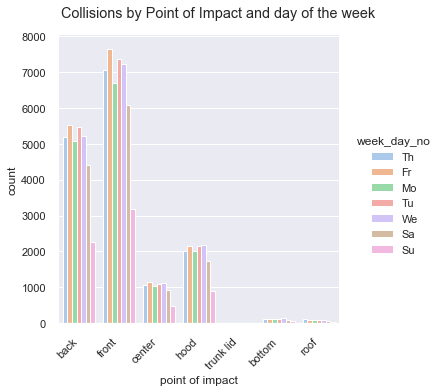

In [127]:
    chart = sns.factorplot(
    data=data,
    x='impact',
    kind = 'count',
    hue = 'week_day_no',
    margin_titles  = True,
    ci = None, aspect = 1,
    palette='pastel'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('point of impact')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by Point of Impact and day of the week')

Text(0.5, 0.98, 'Collisions by Point of Impact in day and night')

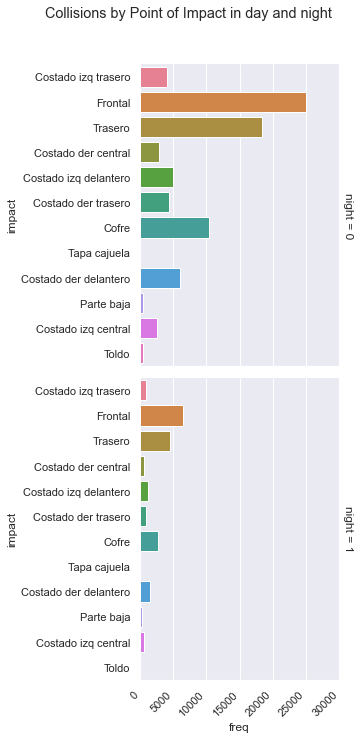

In [83]:
    chart = sns.factorplot(
    data=data,
    y='impact',
    kind = 'count',
    row = 'night',
    margin_titles  = True,
    ci = None, aspect = 1,
    palette="husl"
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('freq')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by Point of Impact in day and night')

Text(0.5, 0.98, 'Collisions by Type of Damage in day and night')

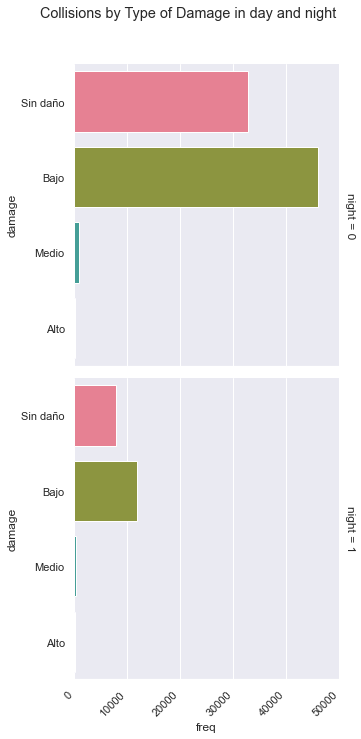

In [86]:
    chart = sns.factorplot(
    data=data,
    y='damage',
    kind = 'count',
    row = 'night',
    margin_titles  = True,
    ci = None, aspect = 1,
    palette="husl"
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('freq')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by Type of Damage in day and night')

In [85]:
data.info

<bound method DataFrame.info of       vehicle_type     color    damage               impact  year  month  day  \
0           Camión    blanco  Sin daño  Costado izq trasero  2018      1   25   
1             Auto     plata  Sin daño              Frontal  2018      1   19   
2             Auto     plata      Bajo              Frontal  2018      1   22   
3             Auto    blanco  Sin daño              Frontal  2018      1   29   
4             Auto  amarillo      Bajo              Frontal  2018      2   26   
...            ...       ...       ...                  ...   ...    ...  ...   
99850         Auto    blanco      Bajo              Trasero  2016     12   20   
99851         Auto     plata      Bajo                Cofre  2016      1   18   
99852         Auto      rojo  Sin daño  Costado der trasero  2016     12   29   
99853         Auto      azul  Sin daño                Cofre  2016      1   30   
99854       Camión    morado  Sin daño              Trasero  2016     12   24

In [27]:
model_order = ['older','2000-2005','2005-2010','2010-2015','2015-2020']
model_data = data.set_index('model_year').loc[model_order]
model_data = model_data.reset_index()

Text(0.5, 0.98, 'Collisions by Model Year and Color')

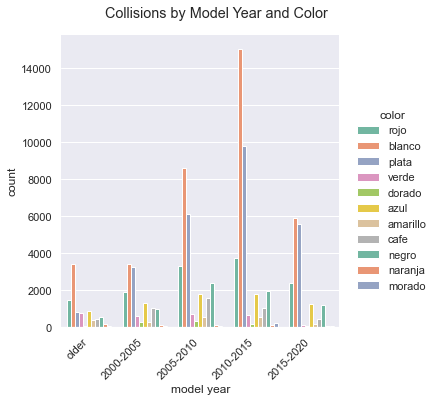

In [30]:
chart = sns.factorplot(
    data=model_data,
    x='model_year',
    kind = 'count',
    hue = 'color',
    margin_titles  = True,
    ci = None, aspect = 1,
    palette='Set2'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels('model year')
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Collisions by Model Year and Color')

In [38]:
plt.subplots(figsize=(25,10))
sns.boxplot(y = data['damage'],order = data['damage'].value_counts().index ,color = 'blue')
plt.title('Color of Vehicles in Collision')
plt.xlabel('Frequencies')
plt.show()

TypeError: Vertical orientation requires numeric `y` variable.

In [46]:
damage = data.groupby('damage').sum()
damage

year   month     day  week_day_no  maxtempC  mintempC  \
damage                                                                 
Alto         485986    1374    3581         1082      6055      3512   
Bajo      116677388  345187  903229       216154   1474253    853027   
Medio       2383717    6821   18514         4727     29588     17047   
Sin daño   81830745  242520  637340       147904   1038366    602816   

          totalSnow_cm   sunHour  uvIndex  uvIndex.1  ...  humidity  precipMM  \
damage                                                ...                       
Alto               0.0    2606.3     1231        961  ...     13716      27.1   
Bajo             409.5  628906.1   303132     253729  ...   3029252    5882.1   
Medio             39.0   12883.9     6101       4832  ...     64732      96.3   
Sin daño         286.0  442326.4   213450     182275  ...   2111141    4105.2   

          pressure    tempC  visibility  winddirDegree  windspeedKmph  \
damage                                                                  
Alto        244784     4947        2342          30861           2339   
Bajo      58724065  1246735      560096        7308630         592228   
Medio      1200297    24325       11438         151821          11487   
Sin daño  41181970   884341      393303        5083190         418315   

          holiday  has_crossing  night  
damage                                  
Alto            1            12     71  
Bajo          861          4800  11897  
Medio          29           102    328  
Sin daño      543          2859   7838  

[4 rows x 27 columns]

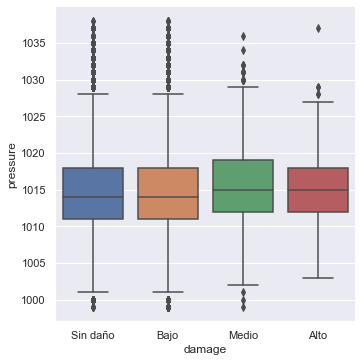

In [55]:
sns.catplot(x="damage", y="pressure", kind = 'box', data=data)

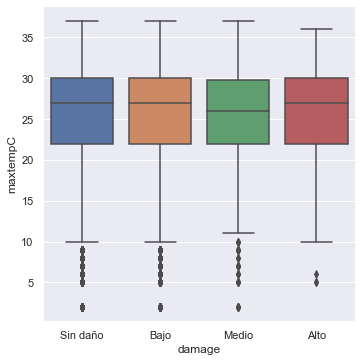

In [57]:
sns.catplot(x="damage", y="maxtempC", kind = 'box', data=data)

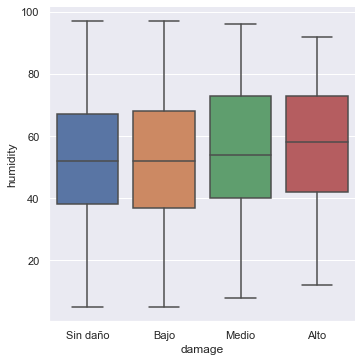

In [58]:
sns.catplot(x="damage", y="humidity", kind = 'box', data=data)

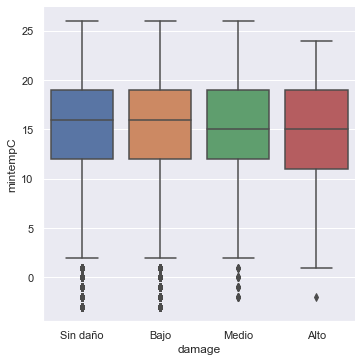

In [62]:
sns.catplot(x="damage", y="mintempC", kind = 'box', data=data)

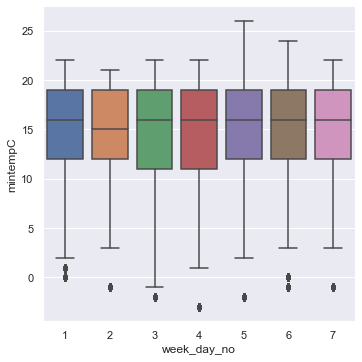

In [64]:
sns.catplot(x="week_day_no", y="mintempC", kind = 'box', data=data)